Time-Sentiment Graphing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
government_df=pd.read_csv('datasets/combined/government_combined_output.csv')
data=government_df

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/combined/government_combined_output.csv'

C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\730684694.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')


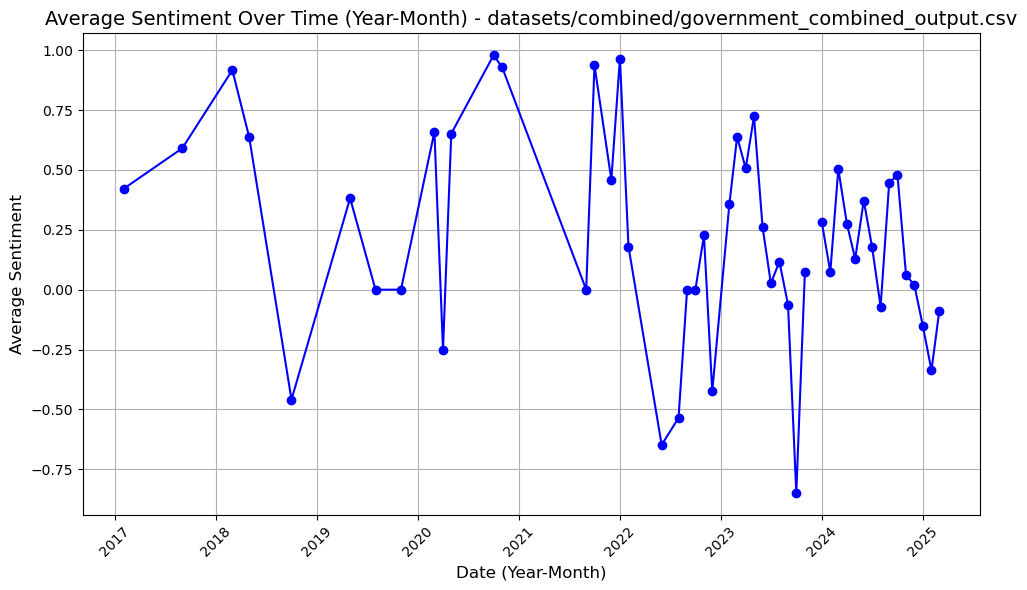

C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\730684694.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')


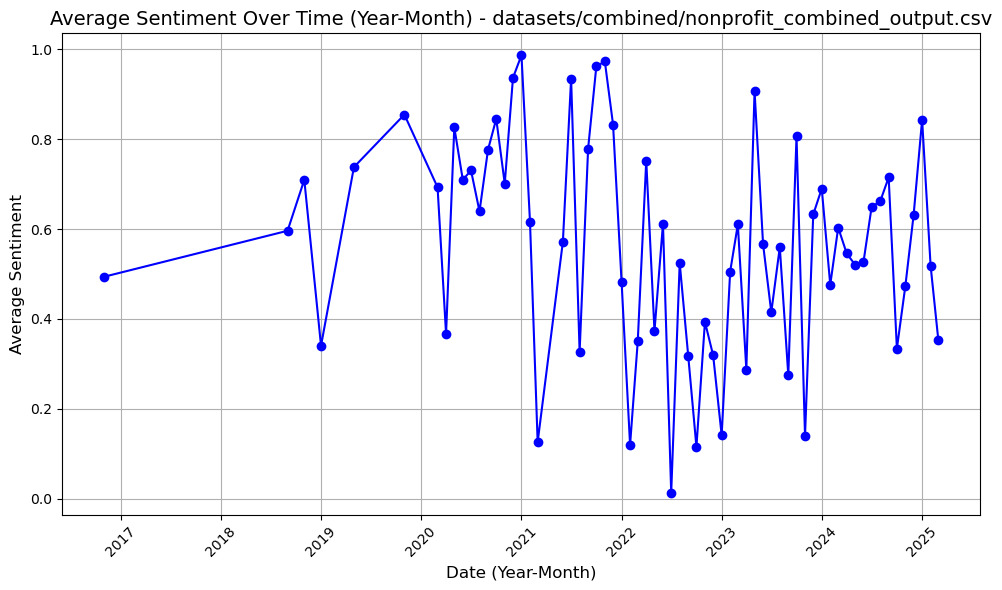

C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\730684694.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')


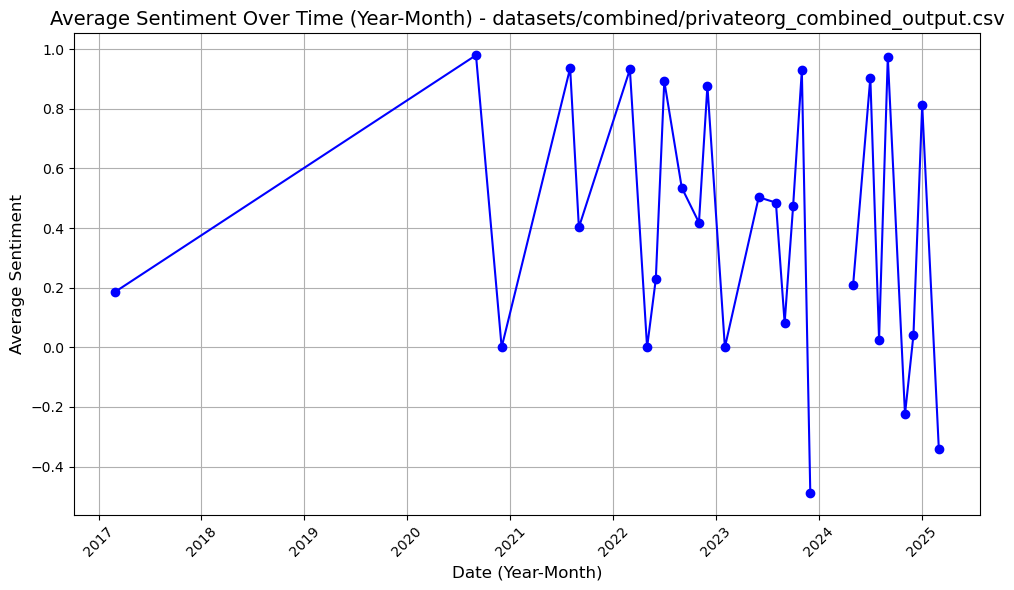

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
csv_files = ['datasets/combined/government_combined_output.csv', 
             'datasets/combined/nonprofit_combined_output.csv', 
             'datasets/combined/privateorg_combined_output.csv']  # Replace with your actual file paths

# Loop through each CSV file
for csv_file in csv_files:
    # Load the data
    data = pd.read_csv(csv_file)
    
    # Convert 'published_at' to datetime
    data['published_at'] = pd.to_datetime(data['published_at'])
    
    # Extract year and month
    data['year_month'] = data['published_at'].dt.to_period('M')
    
    # Group by year and month, and calculate the mean sentiment for each group
    grouped_data = data.groupby('year_month')['sentiment'].mean().reset_index()
    
    # Convert 'year_month' back to a datetime format for easier plotting
    grouped_data['year_month'] = grouped_data['year_month'].dt.to_timestamp()
    
    # Plot the grouped data
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['year_month'], grouped_data['sentiment'], marker='o', linestyle='-', color='b')
    
    # Add labels and title
    plt.title(f'Average Sentiment Over Time (Year-Month) - {csv_file}', fontsize=14)
    plt.xlabel('Date (Year-Month)', fontsize=12)
    plt.ylabel('Average Sentiment', fontsize=12)
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\4239366531.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')
C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\4239366531.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')
C:\Users\zeipe\AppData\Local\Temp\ipykernel_38268\4239366531.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['published_at'].dt.to_period('M')


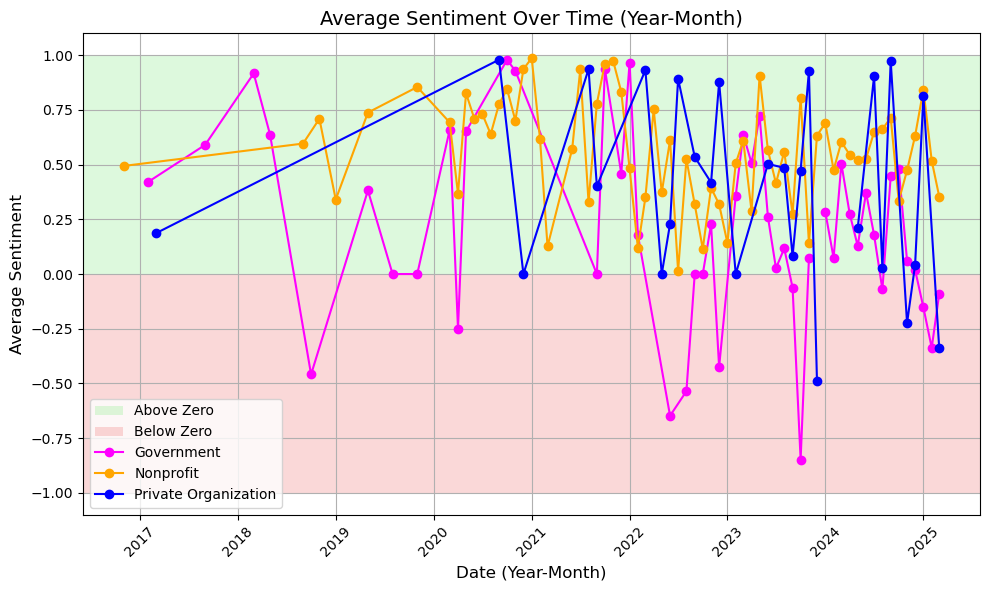

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths and corresponding labels
csv_files = [
    ('datasets/combined/government_combined_output.csv', 'Government'),
    ('datasets/combined/nonprofit_combined_output.csv', 'Nonprofit'),
    ('datasets/combined/privateorg_combined_output.csv', 'Private Organization')
]

# Define a color palette for the plots
colors = ['magenta', 'orange', 'blue']  # Blue, Green, Red

# Create a figure
plt.figure(figsize=(10, 16))

# Highlight the areas above and below the y-axis (0)
#plt.axhspan(0, plt.ylim()[1], facecolor='lightgreen', alpha=0.3, label='Above Zero')  # Above 0
#plt.axhspan(plt.ylim()[0], 0, facecolor='lightcoral', alpha=0.3, label='Below Zero')  # Below 0

# Highlight the areas above and below the y-axis (0)
plt.axhspan(0, plt.ylim()[1], facecolor='lightgreen', alpha=0.3, label='Above Zero')  # Above 0
plt.axhspan(-1, 0, facecolor='lightcoral', alpha=0.3, label='Below Zero')  # Below 0 (from y=-1 to y=0)


# Loop through each CSV file and plot the data
for i, (csv_file, label) in enumerate(csv_files):
    # Load the data
    data = pd.read_csv(csv_file)
    
    # Convert 'published_at' to datetime
    data['published_at'] = pd.to_datetime(data['published_at'])
    
    # Extract year and month
    data['year_month'] = data['published_at'].dt.to_period('M')
    
    # Group by year and month, and calculate the mean sentiment for each group
    grouped_data = data.groupby('year_month')['sentiment'].mean().reset_index()
    
    # Convert 'year_month' back to a datetime format for easier plotting
    grouped_data['year_month'] = grouped_data['year_month'].dt.to_timestamp()
    
    # Plot the grouped data with a unique color and label
    plt.plot(grouped_data['year_month'], grouped_data['sentiment'], marker='o', linestyle='-', color=colors[i], label=label)

# Add labels, title, and legend
plt.title('Average Sentiment Over Time (Year-Month)', fontsize=14)
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()  # Add a legend to differentiate the lines

# Adjust layout and show the plot
plt.tight_layout()
plt.show()